In [8]:
import os

In [9]:
os.getcwd()

'C:\\Users\\bharvee23'

In [10]:
import pandas as pd
import numpy as np

In [11]:
df= pd.read_csv('GMT20210417-140151_Recording.txt',delimiter = "\t")

In [12]:
df.head(10)

,Time,Name,Text
0,00:19:04,"Bonnie Franson, AICP CEP, PP:","hi, yes it can be made available on the Town w..."
1,00:19:46,James Carmody:,Glad to be here!
2,00:19:54,"Adriana Beltrani, AICP:",Hi everyone! thanks for joining!
3,00:22:24,"Bonnie Franson, AICP CEP, PP:",thanks for letting us know!
4,00:28:30,"Bonnie Franson, AICP CEP, PP:",We can make copies of the survey available at ...
5,00:28:47,James Carmody:,That's a good idea Bonnie -- please do!
6,00:32:36,Jeffrey Kessler:,Some aspects need more detail which I assume t...
7,00:32:59,James Carmody:,I'm not sure if a semi-rural connection to New...
8,00:33:32,Susan Erikson:,Is this where we write our comments?
9,00:33:48,"Bonnie Franson, AICP CEP, PP:",yes re comments - we will also open it up at t...


In [13]:
#Retrieve all the satisfied messages


#List of words to be searched 
include_list =['thank you','thanks','great','lucky','awesome','glad','help','hope','encourage','love','agree','sure','congratulations','wow'] 

df_happy =  df.loc[df['Text'].str.lower().str.contains('|'.join(include_list),na=False) , ['Time','Name','Text']]

exclude_list =['whatsapp','will try','revert','which','what','shall','mr','medicine','try','video',
                'query','grinding','taste','colour','great day','practice','adding','bro','harmful','tense', 'doctor','experience','install','imaginary','exercise','fearing','joined','complaints','clarifying','member','issue','accepting','order','line','afraid','weakness','manage',
               'evidence','extreme','looking', 'mentality','prefer','opinion','officer','recipe','roasted','thin','not well','reached','excercise', 'ask','avoid','where','aspire','don''t','sud','hunger','answer','hoping','planning','dia ','confusing','not sure']

df_happy = df_happy[~df_happy['Text'].str.lower().str.contains('|'.join(exclude_list),na=False)]

#Add a new column emotion and assign "1" for happy messages
df_happy["emotion"] = 1
df_happy

,Time,Name,Text,emotion
1,00:19:46,James Carmody:,Glad to be here!,1
2,00:19:54,"Adriana Beltrani, AICP:",Hi everyone! thanks for joining!,1
3,00:22:24,"Bonnie Franson, AICP CEP, PP:",thanks for letting us know!,1
11,00:34:05,"Adriana Beltrani, AICP:",Please be sure your comments are addressed to ...,1
25,00:41:25,James Carmody:,2/3 of renters are cost burdened?! Wow....,1
33,00:48:37,Alana Sweeny:,Agree!,1
34,00:49:39,eric greenberg:,"Yes agree, How many soccer fields do we really...",1
40,00:52:12,Alana Sweeny:,"Agreed, Susan",1
42,00:52:27,Wendy Tyler:,Agreed with Susan as well,1
59,01:02:45,Jeffrey Kessler:,Agreed Eric on the tax situation!!,1


In [14]:
#Retrieve all the Not Satisfied messages
#List of words to be searched to retrieve replies  to Tim and Raj


unhappy_list =['weakness','manage','evidence','extreme','confusing','limit','consequences','burden','cannot','No']

df_unhappy = df.loc[df['Text'].str.lower().str.contains('|'.join(unhappy_list),na=False) , ['Time','Name','Text']]


#List of words to be searched in the df_unhappy dataframe to eliminate those questions
#Eliminating Happy texts and suggestions/advice from doctor members.

dropList = ['good morning','good evening','good afternoon','awesome','query','joined','thank','welcome','great','congratulations','congrats','wow','motivational','please','good','perfect']


df_unhappy = df_unhappy.loc[~df_unhappy['Text'].str.lower().str.contains('|'.join(dropList),na=False)]


#Add a new column emotion and assign "0" for unhappy messages
df_unhappy["emotion"] = 0
df_unhappy

,Time,Name,Text,emotion
26,00:42:05,Alana Sweeny:,Could you break down what part of the renters ...,0
56,01:02:15,eric greenberg:,Yes we have to find a way to spend the tax bur...,0
75,01:11:12,Alana Sweeny:,The balance is that people who live on waterfr...,0
81,01:14:49,Susan Erikson:,It looks like there is no parking and since mo...,0
87,01:19:20,Anne Campbell:,I think there's a limit on height with existin...,0
91,01:22:36,Susan Erikson:,Businesses/landlords should consequences for n...,0


In [15]:
#merge both happy and unhappy dataframes row-wise
dfs =[]
dfs.append(df_happy)
dfs.append(df_unhappy)


df_emotion = pd.concat(dfs)
df_emotion = df_emotion[['Text','emotion']]
df_emotion

,Text,emotion
1,Glad to be here!,1
2,Hi everyone! thanks for joining!,1
3,thanks for letting us know!,1
11,Please be sure your comments are addressed to ...,1
25,2/3 of renters are cost burdened?! Wow....,1
33,Agree!,1
34,"Yes agree, How many soccer fields do we really...",1
40,"Agreed, Susan",1
42,Agreed with Susan as well,1
59,Agreed Eric on the tax situation!!,1


In [16]:
!pip install WordCloud

In [17]:
from wordcloud import WordCloud

In [18]:
df_new =df.copy()
df_new.head()
print(df)


         Time                           Name  \
0    00:19:04  Bonnie Franson, AICP CEP, PP:   
1    00:19:46                 James Carmody:   
2    00:19:54        Adriana Beltrani, AICP:   
3    00:22:24  Bonnie Franson, AICP CEP, PP:   
4    00:28:30  Bonnie Franson, AICP CEP, PP:   
..        ...                            ...   
126  01:53:10                Victoria Weiss:   
127  01:53:16              charlie melchner:   
128  01:53:31                  Alana Sweeny:   
129  01:54:10                  Alana Sweeny:   
130  01:54:26  Bonnie Franson, AICP CEP, PP:   

                                                  Text  
0    hi, yes it can be made available on the Town w...  
1                                     Glad to be here!  
2                     Hi everyone! thanks for joining!  
3                          thanks for letting us know!  
4    We can make copies of the survey available at ...  
..                                                 ...  
126  No more pizzerias, 

In [19]:
df_new['Text'] = df_new['Text'].str.replace('\d+', '')

print(df)

         Time                           Name  \
0    00:19:04  Bonnie Franson, AICP CEP, PP:   
1    00:19:46                 James Carmody:   
2    00:19:54        Adriana Beltrani, AICP:   
3    00:22:24  Bonnie Franson, AICP CEP, PP:   
4    00:28:30  Bonnie Franson, AICP CEP, PP:   
..        ...                            ...   
126  01:53:10                Victoria Weiss:   
127  01:53:16              charlie melchner:   
128  01:53:31                  Alana Sweeny:   
129  01:54:10                  Alana Sweeny:   
130  01:54:26  Bonnie Franson, AICP CEP, PP:   

                                                  Text  
0    hi, yes it can be made available on the Town w...  
1                                     Glad to be here!  
2                     Hi everyone! thanks for joining!  
3                          thanks for letting us know!  
4    We can make copies of the survey available at ...  
..                                                 ...  
126  No more pizzerias, 

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [22]:
df_new = df_new.applymap(str)

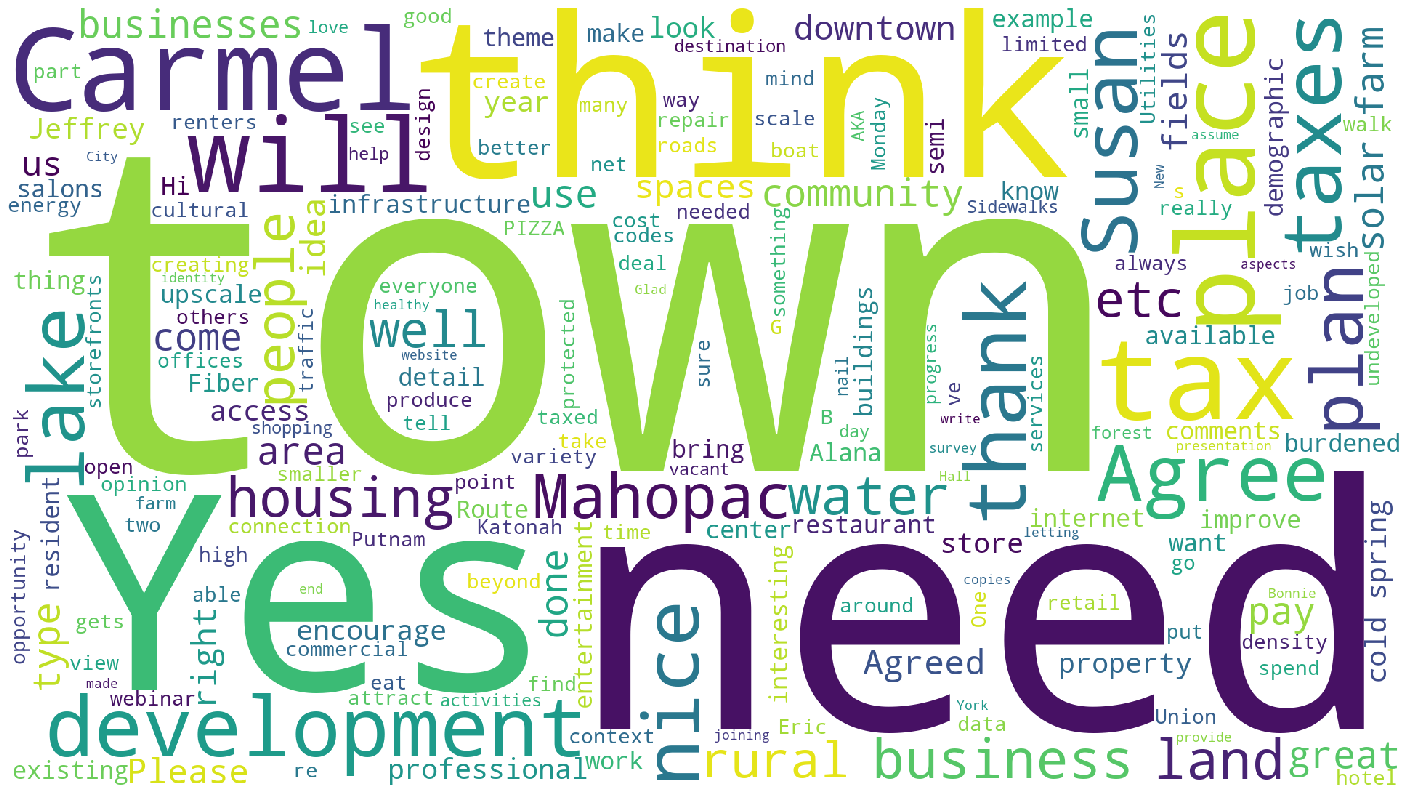

In [23]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_new.Text))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('df.png')
plt.show()#